In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# SMOTE (Synthetic Minority Oversampling Technique)

SMOTE is a technique used in ML to address the imbalanced dataset where the minority class has significantly fewer instances than majority class.

SMOTE involves generating synthetic instances of the minority class by interpoling between existing instances.

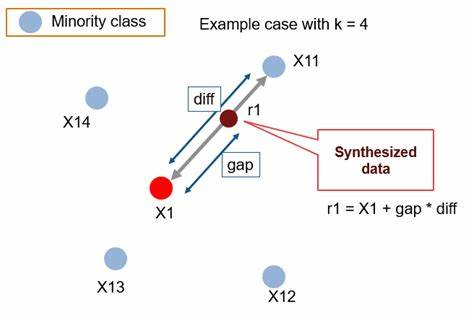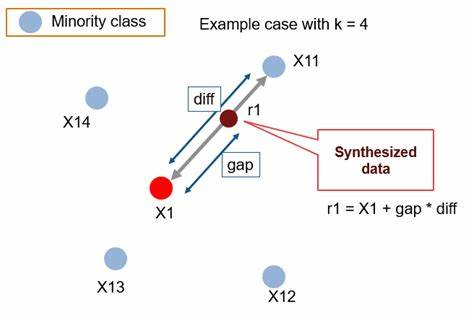

In [2]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class= 1, weights=[0.90], random_state=12)

In [5]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

In [6]:
df = pd.concat([df1, df2], axis=1)

In [7]:
df['target'].value_counts()

target
0    92
1     8
Name: count, dtype: int64

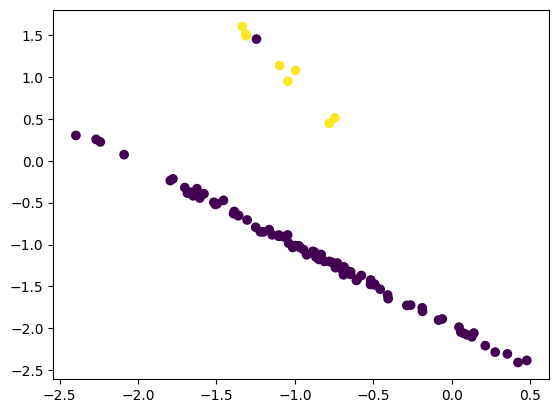

In [9]:
plt.scatter(df['f1'], df['f2'], c=df['target'])

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
oversample = SMOTE()

In [12]:
X, y = oversample.fit_resample(df[['f1', 'f2']], df['target'])

In [13]:
X.shape

(184, 2)

In [14]:
y.shape

(184,)

In [15]:
len(y[y==0])

92

In [16]:
len(y[y==1])

92

In [17]:
df1_oversampled = pd.DataFrame(X, columns=['f1', 'f2'])
df2_oversampled = pd.DataFrame(y, columns=['target'])

In [18]:
df_oversampled = pd.concat([df1_oversampled, df2_oversampled], axis=1)

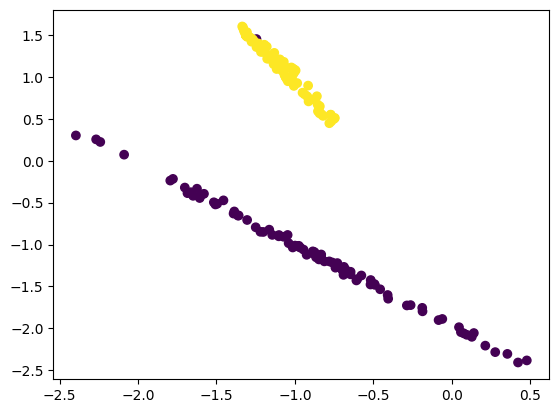

In [19]:
plt.scatter(df_oversampled['f1'], df_oversampled['f2'], c=df_oversampled['target'])